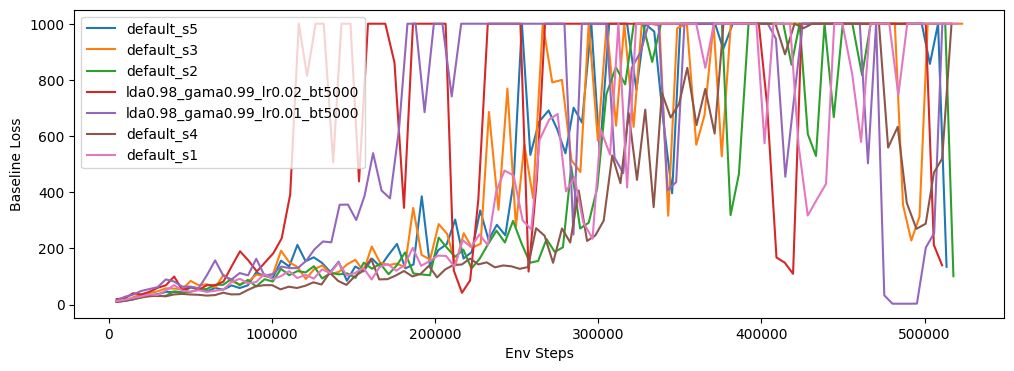

In [14]:
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt, glob, os
import re

def extract(run_dir, x_tag="Train_EnvstepsSoFar", y_tag="Eval_AverageReturn"):
    ea = event_accumulator.EventAccumulator(run_dir,
                                            size_guidance={"scalars": 0})
    ea.Reload()
    xs = [e.value for e in ea.Scalars(x_tag)]
    ys = [e.value for e in ea.Scalars(y_tag)]
    return xs, ys
log_dir="./data"
log_paths = glob.glob(os.path.join(log_dir, "*pendulum*"))
# log_paths = ["/home/Courses/大三上/homework_fall2023/hw2/data/q2_pg_cheetah_HalfCheetah-v4_12-09-2025_18-23-05",
#              "/home/Courses/大三上/homework_fall2023/hw2/data/q2_pg_cheetah_baseline_HalfCheetah-v4_13-09-2025_04-20-50"
#     ]
plt.figure(figsize=(12,4))
for run in log_paths:
    x, y = extract(run)
    name  = os.path.basename(run)          # q2_pg_cartpole_lb_rtg_na_CartPole-v0_...
    label = re.search(r"q2_pg_pendulum_(.*?)_Inverted", name)
    if label:
        label = label.group(1)
    else:
        label = "None"
    plt.plot(x, y, label=label)
plt.xlabel("Env Steps"); plt.ylabel("Baseline Loss")
plt.legend()
plt.show()

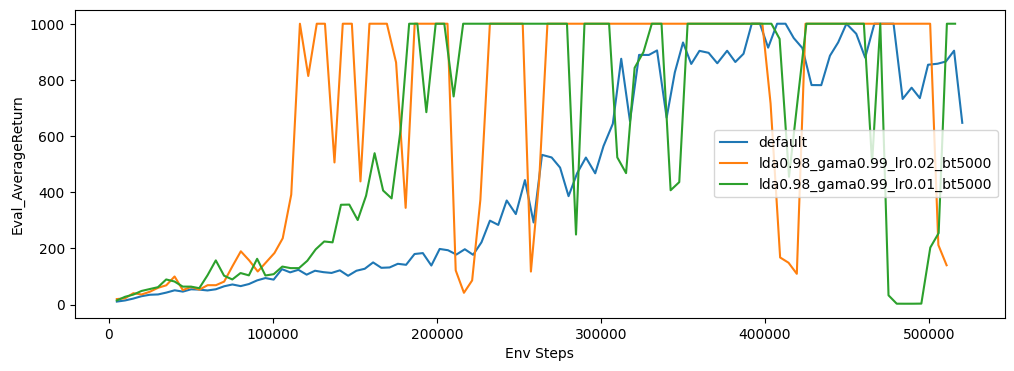

In [15]:
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt, glob, os
import numpy as np
import re

def extract(run_dir, x_tag="Train_EnvstepsSoFar", y_tag="Eval_AverageReturn"):
    ea = event_accumulator.EventAccumulator(run_dir,
                                            size_guidance={"scalars": 0})
    ea.Reload()
    xs = [e.value for e in ea.Scalars(x_tag)]
    ys = [e.value for e in ea.Scalars(y_tag)]
    return xs, ys
log_dir="./data"
log_paths = glob.glob(os.path.join(log_dir, "*pendulum*"))
# log_paths = ["/home/Courses/大三上/homework_fall2023/hw2/data/q2_pg_cheetah_HalfCheetah-v4_12-09-2025_18-23-05",
#              "/home/Courses/大三上/homework_fall2023/hw2/data/q2_pg_cheetah_baseline_HalfCheetah-v4_13-09-2025_04-20-50"
#     ]
plt.figure(figsize=(12,4))
# ... existing code ...
y_list = []                           # ← 用来收集 default run 的 y 曲线

for run in log_paths:
    if "default" in run:
        x, y = extract(run)
        y_list.append(np.asarray(y))  # 每条 y 都存进列表

# --------------- 求平均 ----------------
if y_list:                            # 至少找到一条 default 曲线才继续
    # 若每条曲线长度不同，先对齐到最短长度再求平均
    min_len = min(len(arr) for arr in y_list)
    y_stack = np.stack([arr[:min_len] for arr in y_list])   # shape = (n_runs, min_len)
    y_ave = y_stack.mean(axis=0)                            # shape = (min_len,)
    x_plot = x[:min_len]                                    # x 同样截断
    plt.plot(x_plot, y_ave, label="default")
# --------------------------------------

# 画其它 run
for run in log_paths:
    if "default" in run:
        continue
    x, y = extract(run)
    name  = os.path.basename(run)
    m = re.search(r"q2_pg_pendulum_(.*?)_Inverted", name)
    label = m.group(1) if m else "None"
    plt.plot(x, y, label=label)

plt.xlabel("Env Steps"); plt.ylabel("Eval_AverageReturn")
plt.legend()
plt.show()